In [2]:
import pandas as pd
import numpy as np
import joblib
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import pickle as pkl
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from scipy import sparse


#import nltk
#nltk.download('stopwords')


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv("NETFLIX_REVIEWS.csv", index_col=0)
df.head(5)

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,7e73f80e-a8fd-4ff3-b09b-502f0ad058ff,152618553977019693742,A Google user,Works great on my Evo! Glad android phones are...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:37
1,dab55eca-c2a0-45a8-93e3-9860c1c548da,234382942865437071667,A Google user,Works great on HTC incredible. Can't wait to t...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:52
2,a3b8fa06-8b8f-4f2f-a1fa-fd37c4cbf598,174473604608358796368,A Google user,Works great on nexus s,5,0,1.5.2 build 389,2011-05-12 18:55:14
3,837fdfa5-606d-4cec-9e9a-e4a83dad633e,286593453219054880269,A Google user,"Working perfect for me on EVO, running CM 7.0.3.1",5,0,1.2.1 build 843839-1.2.0-30,2011-05-12 19:31:46
4,a8aaecb2-6984-44f7-b958-3f89f64d75f9,167276875678680630145,A Google user,cm7 2.3.3 N1,5,0,1.5.2 build 389,2011-05-12 19:32:50


In [5]:
df.tail(5)

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
1531121,5b819b4a-f49f-4012-b1cc-146b581aec6e,517084783367708002209,Az*********er,Bad app,1,0,NaN,2023-11-15 22:34:37
1531122,afe340b9-68df-4df9-8a86-7e9304e1e271,217585066694826156159,Ma***********ey,What more do you want from me tf? BRING BACK P...,2,0,8.94.0 build 10 50546,2023-11-15 22:44:59
1531123,3015ab73-75e8-4f17-8377-4757abbb8f0c,268385941811343301666,Em************ey,I will love this app,5,0,NaN,2023-11-15 22:45:05
1531124,25b4b68e-a432-4f21-bf1c-68835f88b56e,259993922622854778058,****,The content is great but they keep adding more...,2,0,8.94.0 build 10 50546,2023-11-15 22:48:54
1531125,7c8e755c-0505-4e0c-ac89-719f8f5fff50,527925027675131929486,Ra************on,"I promise you on this, I WILL NOT RESUBSCRIBE ...",1,1,8.94.0 build 10 50546,2023-11-15 22:54:42


In [6]:
# Store and print the initial number of rows in the DataFrame
nr_rows1 = df.shape[0]  
print(f"There are {nr_rows1} rows in the dataset.")

df = df.drop_duplicates()  # Remove duplicate rows from the DataFrame
nr_rows2 = df.shape[0]  # Store the number of rows after removing duplicates

# Print the number of duplicates that were removed
print(f"There are {nr_rows1-nr_rows2} duplicated rows found in the dataset.")  

There are 1531126 rows in the dataset.
There are 0 duplicated rows found in the dataset.


In [7]:
# Specify the column names to remove
columns_to_remove = ['review_id', 'pseudo_author_id', 'author_name', 'author_app_version', 'review_likes']

# Remove the specified columns that is not included later
df1 = df.drop(columns_to_remove, axis=1)

df1.head(5)

,review_text,review_rating,review_timestamp
0,Works great on my Evo! Glad android phones are...,5,2011-05-12 18:50:37
1,Works great on HTC incredible. Can't wait to t...,5,2011-05-12 18:50:52
2,Works great on nexus s,5,2011-05-12 18:55:14
3,"Working perfect for me on EVO, running CM 7.0.3.1",5,2011-05-12 19:31:46
4,cm7 2.3.3 N1,5,2011-05-12 19:32:50


In [8]:
# Convert the timestamp column to datetime format
df1['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

# Extract only the year portion
df1['review_year'] = df1['review_timestamp'].dt.year

# Drop the original timestamp column
df2 = df1.drop('review_timestamp', axis=1)

# Filter the dataframe to include only the years from 2017 to 2023
df3 = df2[(df2['review_year'] >= 2017) & (df2['review_year'] <= 2023)]

# Reset the index of the dataframe
df3 = df3.reset_index(drop=True)

# Display the first 5 rows of the dataframe
df3.head(5)

,review_text,review_rating,review_year
0,"I'd love to use it with my new membership, but...",2,2017
1,Right know I can not download vids or movies s...,4,2017
2,How it has New moves😊😊😊😚😍,5,2017
3,I like are should I say love it because you ca...,5,2017
4,Yay,5,2017


In [17]:
df3.describe().round(3)


,review_rating,review_year
count,1121434.000,1121434.000
mean,3.931,2019.878
std,1.586,1.757
min,1.000,2017.000
25%,3.000,2019.000
50%,5.000,2020.000
75%,5.000,2021.000
max,5.000,2023.000


In [9]:
df3.tail()

,review_text,review_rating,review_year
1121429,Bad app,1,2023
1121430,What more do you want from me tf? BRING BACK P...,2,2023
1121431,I will love this app,5,2023
1121432,The content is great but they keep adding more...,2,2023
1121433,"I promise you on this, I WILL NOT RESUBSCRIBE ...",1,2023


In [130]:
###Visualization Part

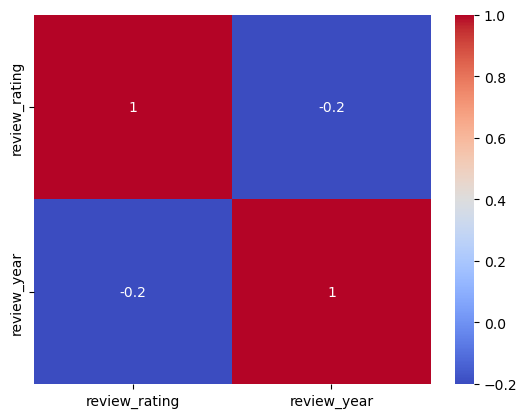

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with multiple columns
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

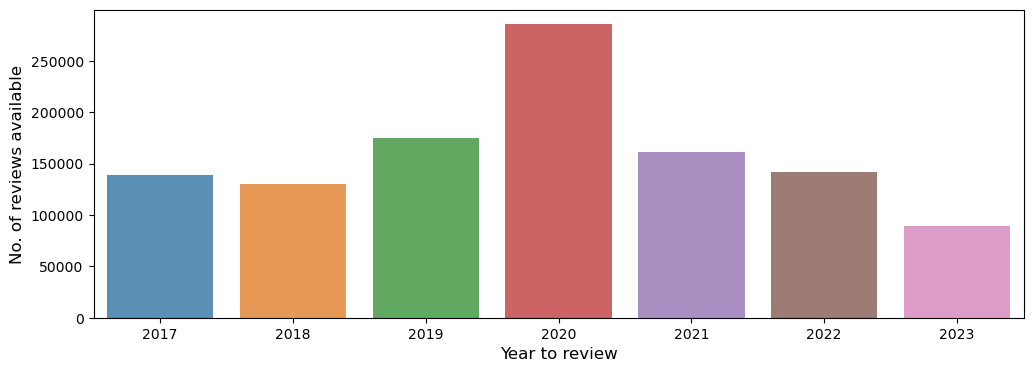

In [132]:
cnt_year = df3['review_year'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_year.index, y=cnt_year.values, alpha=0.8)
plt.xlabel('Year to review', fontsize=12)
plt.ylabel('No. of reviews available', fontsize=12)
plt.show()

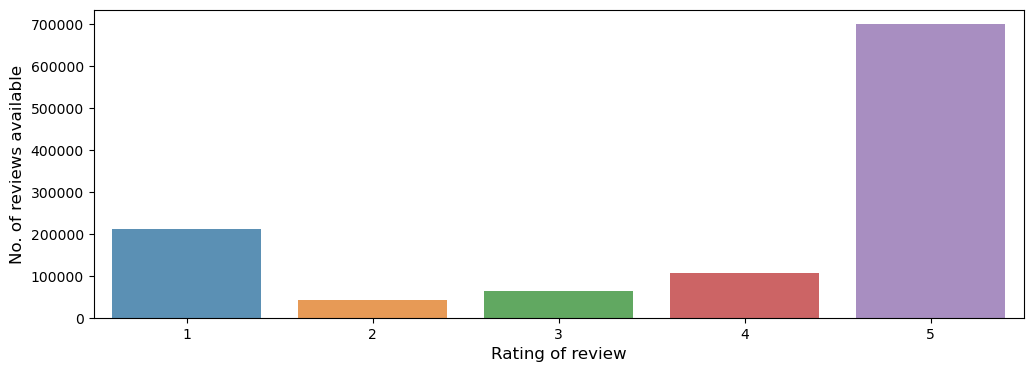

In [133]:
cnt_rating = df3['review_rating'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_rating.index, y=cnt_rating.values, alpha=0.8)
plt.xlabel('Rating of review', fontsize=12)
plt.ylabel('No. of reviews available', fontsize=12)
plt.show()

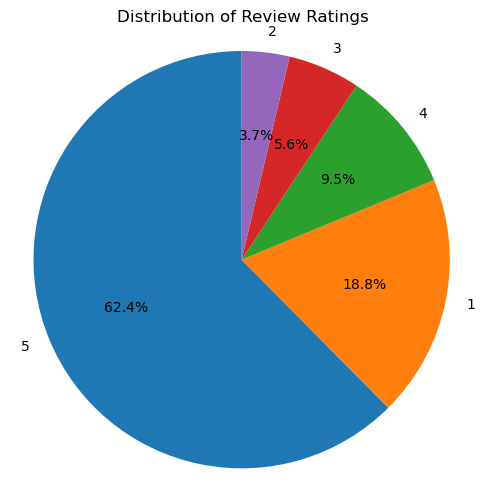

In [152]:
cnt_rating = df3['review_rating'].value_counts()

plt.figure(figsize=(6, 6))  # Set the figure size as square for a better representation of the pie chart
plt.pie(cnt_rating.values, labels=cnt_rating.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Distribution of Review Ratings')
plt.show()

/var/folders/9h/r1_v686s0h11yt6n4p0q1qvm0000gn/T/ipykernel_55720/409688594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['review_text'] = filtered_df1['review_text'].astype(str)
/var/folders/9h/r1_v686s0h11yt6n4p0q1qvm0000gn/T/ipykernel_55720/409688594.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['review_text'] = filtered_df2['review_text'].astype(str)
/var/folders/9h/r1_v686s0h11yt6n4p0q1qvm0000gn/T/ipykernel_55720/409688594.py:15: SettingWithCopyWarning: 
A value i

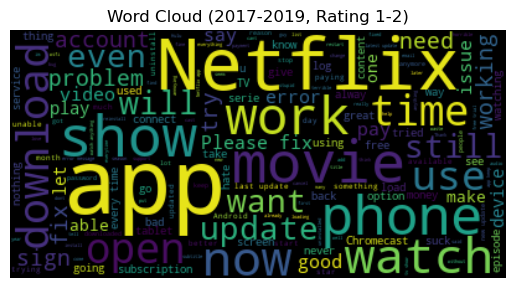

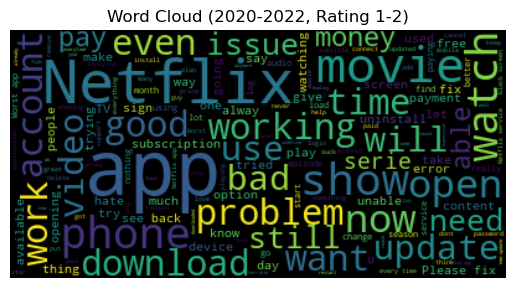

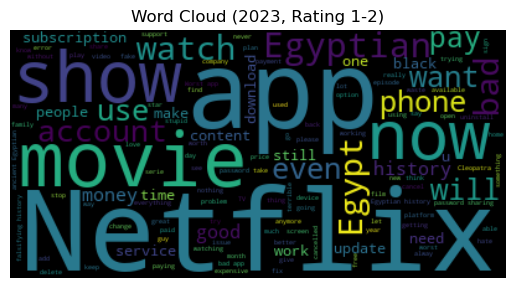

In [165]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a dataframe named df3

# Filter the dataframe based on review_rating and review_year conditions
filtered_df1 = df3[(df3['review_rating'].isin([1, 2])) & (df3['review_year'].between(2017, 2019))]
filtered_df2 = df3[(df3['review_rating'].isin([1, 2])) & (df3['review_year'].between(2020, 2022))]
filtered_df3 = df3[(df3['review_rating'].isin([1, 2])) & (df3['review_year'] == 2023)]

# Convert 'review_text' column to string type
filtered_df1['review_text'] = filtered_df1['review_text'].astype(str)
filtered_df2['review_text'] = filtered_df2['review_text'].astype(str)
filtered_df3['review_text'] = filtered_df3['review_text'].astype(str)

# Generate word cloud for filtered_df1
wordcloud1 = WordCloud().generate(' '.join(filtered_df1['review_text']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2017-2019, Rating 1-2)")
plt.show()

# Generate word cloud for filtered_df2
wordcloud2 = WordCloud().generate(' '.join(filtered_df2['review_text']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2020-2022, Rating 1-2)")
plt.show()

# Generate word cloud for filtered_df3
wordcloud3 = WordCloud().generate(' '.join(filtered_df3['review_text']))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2023, Rating 1-2)")
plt.show()

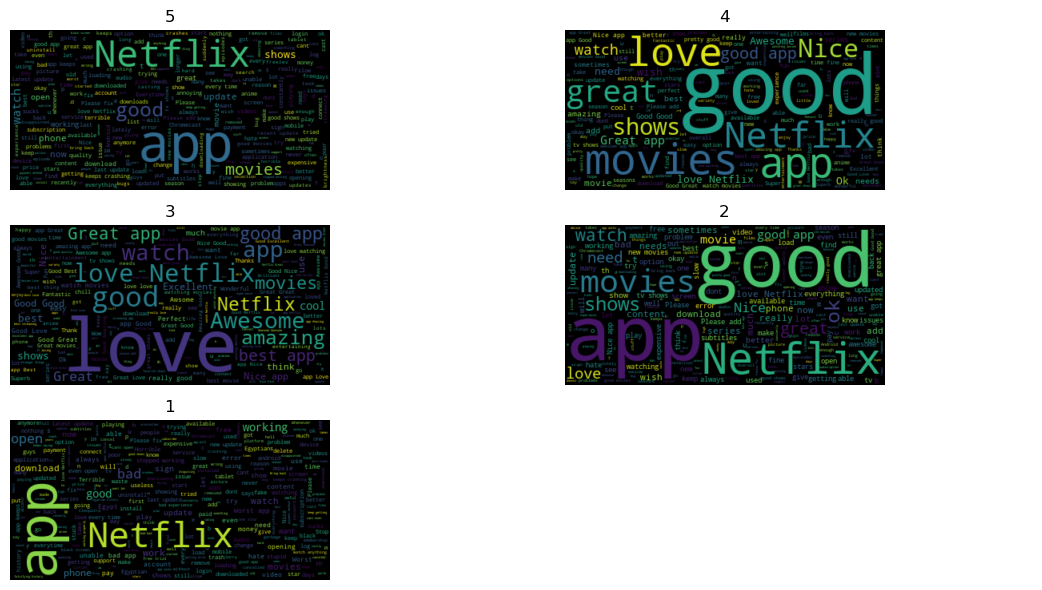

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Determine the number of unique ratings
unique_ratings = len(df3['review_rating'].unique())

# Calculate the number of rows and columns for the subplots
num_rows = (unique_ratings + 1) // 2  # Round up to the nearest integer
num_cols = 2

# Adjust the figsize and dpi parameters to control the overall size and resolution
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6), dpi=100)

k = 0
for i, ax in enumerate(axs.reshape(-1)):
    if k >= unique_ratings:
        ax.axis('off')
        continue

    dfplot = df3[df3['review_rating'] == df3['review_rating'].unique()[k]]
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False).generate(dfplot['review_text'].to_string())
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(df['review_rating'].unique()[k])
    ax.axis('off')
    k += 1

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [137]:
from collections import Counter

#Finding the most common words in all posts.
words = list(df4["review_text"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('I', 4941),
 ('the', 4755),
 ('to', 4047),
 ('and', 3798),
 ('it', 3665),
 ('is', 2713),
 ('app', 2614),
 ('a', 2155),
 ('my', 1772),
 ('of', 1725),
 ('on', 1585),
 ('for', 1539),
 ('Netflix', 1527),
 ('good', 1477),
 ('you', 1456),
 ('movies', 1424),
 ('love', 1401),
 ('but', 1385),
 ('this', 1265),
 ('have', 1223),
 ('watch', 1215),
 ('not', 1204),
 ('in', 1143),
 ('i', 1086),
 ('Good', 1061),
 ('that', 1034),
 ('like', 909),
 ('shows', 866),
 ('so', 840),
 ('can', 742),
 ('all', 716),
 ('It', 703),
 ('with', 692),
 ('are', 652),
 ('me', 642),
 ('Love', 634),
 ('Great', 627),
 ('great', 598),
 ('just', 597),
 ('more', 592)]

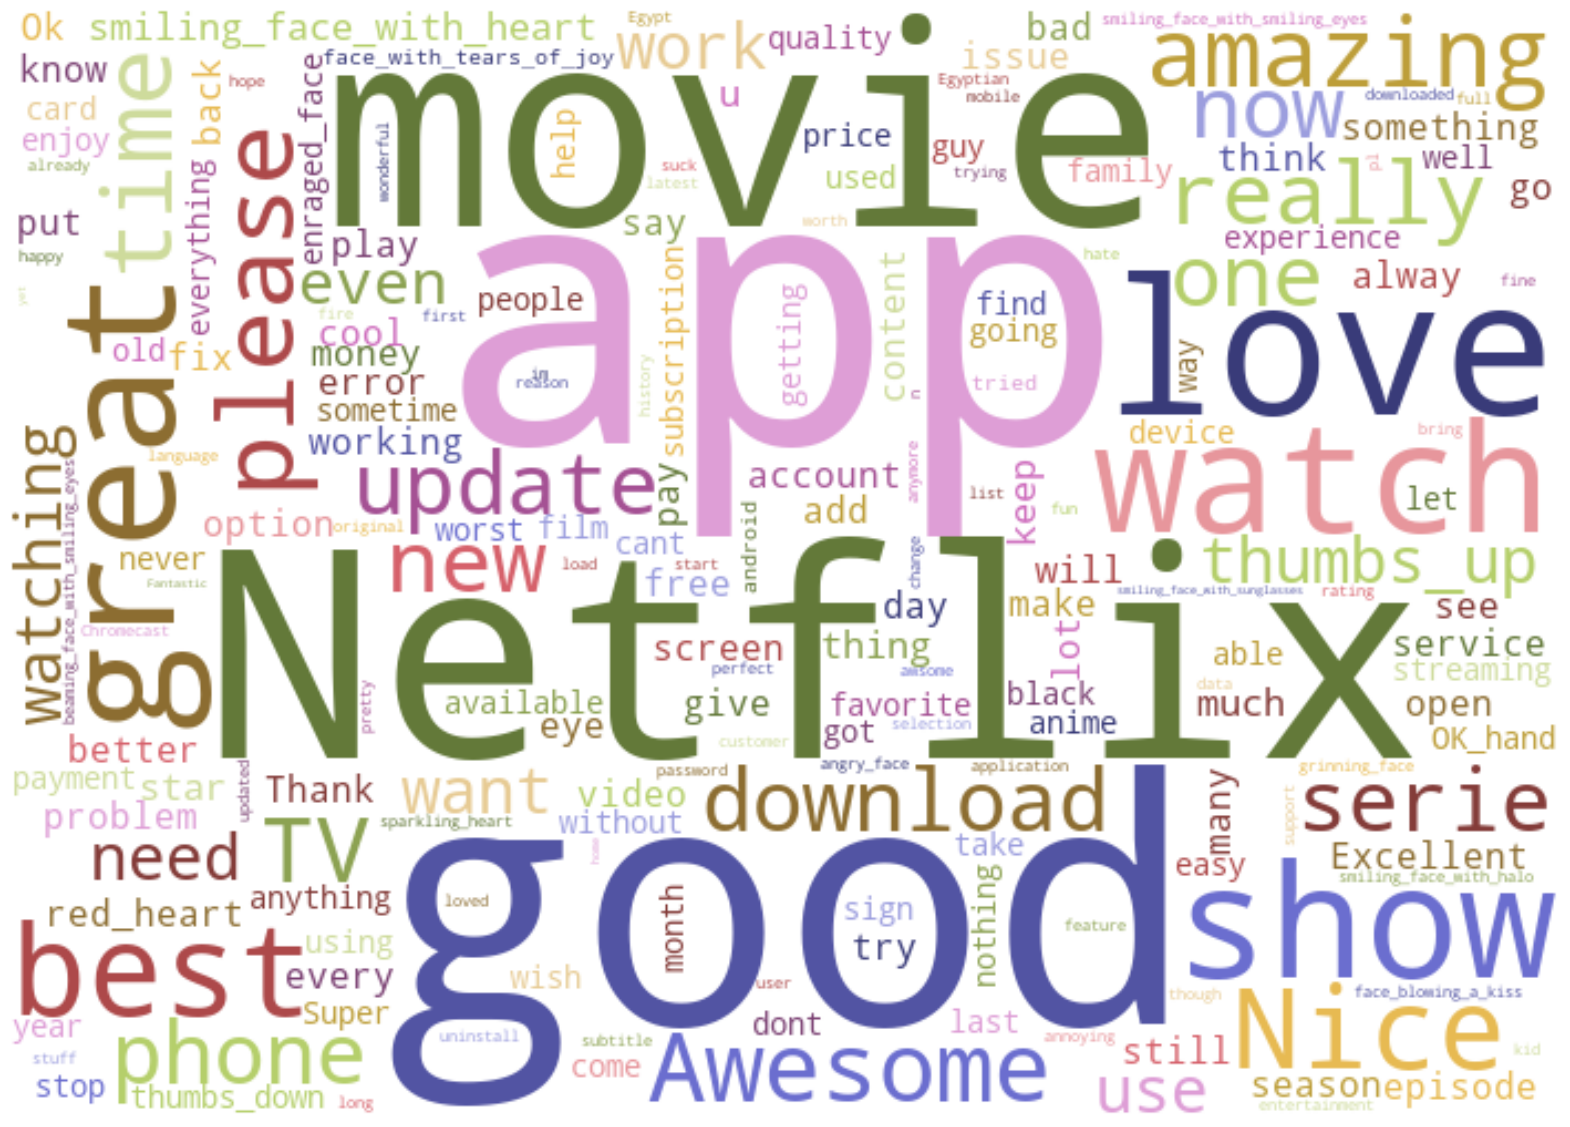

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wc = WordCloud(width=700, height=500,
               collocations=False, background_color="white",
               colormap="tab20b").generate(" ".join(words))

# Set up the plot
plt.figure(figsize=(20,20))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

(array([210758.,      0.,  41506.,      0.,      0.,  62789.,      0.,
        106186.,      0., 700195.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

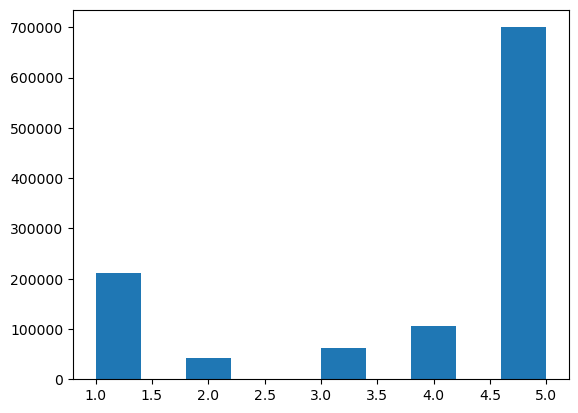

In [142]:
plt.hist(df3['review_rating'])

In [143]:
column_name = 'review_likes'  # Replace with the actual column name

column_min = df3[column_name].min()
column_max = df3[column_name].max()

print(f"The range of values in {column_name} column: {column_min} to {column_max}")

The range of values in review_likes column: 0 to 8231


In [144]:
# Convert 'rating_year' column to integer (if it's stored as string)
df4['review_year'] = df4['review_year'].astype(int)

# Create a new column to categorize the time periods
df4['time_period'] = pd.cut(df4['review_year'], bins=[2016, 2019, 2022, 2024], labels=['2017-2019', '2020-2022', '2023'])

# Calculate the average ratings per time period
avg_ratings = df4.groupby('time_period')['review_rating'].mean()

# Print the average ratings per time period
print(avg_ratings)

time_period
2017-2019    4.205629
2020-2022    3.919700
2023         2.887403
Name: review_rating, dtype: float64


In [147]:
avg_ratings = df4.groupby('review_year')['review_rating'].mean()
print(avg_ratings)

review_year
2017    4.339641
2018    4.157573
2019    4.135292
2020    4.042558
2021    3.859077
2022    3.731988
2023    2.887403
Name: review_rating, dtype: float64


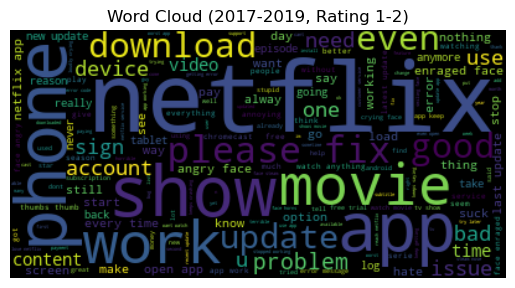

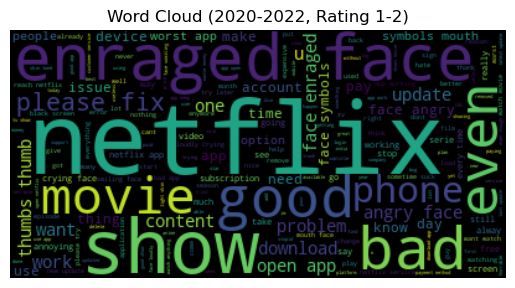

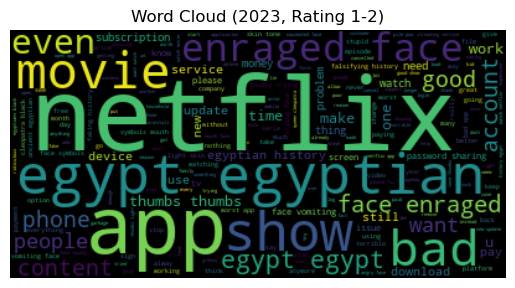

In [175]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a dataframe named df3

# Filter the dataframe based on review_rating and review_year conditions
filtered_df1 = df5[(df5['review_rating'].isin([1, 2])) & (df5['review_year'].between(2017, 2019))]
filtered_df2 = df5[(df5['review_rating'].isin([1, 2])) & (df5['review_year'].between(2020, 2022))]
filtered_df3 = df5[(df5['review_rating'].isin([1, 2])) & (df5['review_year'] == 2023)]

# Generate word cloud for filtered_df1
wordcloud1 = WordCloud().generate(' '.join(filtered_df1['review_text']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2017-2019, Rating 1-2)")
plt.show()

# Generate word cloud for filtered_df2
wordcloud2 = WordCloud().generate(' '.join(filtered_df2['review_text']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2020-2022, Rating 1-2)")
plt.show()

# Generate word cloud for filtered_df3
wordcloud3 = WordCloud().generate(' '.join(filtered_df3['review_text']))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2023, Rating 1-2)")
plt.show()

In [145]:
###Data Processing

In [180]:
sample_percentage = 1.5 # Specify the percentage of the dataset you want to retain

# Randomly sample the dataset
df4 = df3.sample(frac=sample_percentage/100)  # Select a percentage of the dataset
df4_sorted = df4.sort_values('review_year',)
df4_indexed = df4_sorted.reset_index(drop=True)
# Print the sorted DataFrame with a new index

df4 = df4_indexed.copy()

In [181]:
df4.tail(5)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16822 entries, 0 to 16821
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    16819 non-null  object
 1   review_rating  16822 non-null  int64 
 2   review_likes   16822 non-null  int64 
 3   review_year    16822 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 525.8+ KB


In [182]:
df4['review_text'].unique()


array(['It has all good movies 🎥', 'Giod',
       'Abdomen lots of movies that I like', ...,
       'Falsifying Egyptian history is unforgivable. Shame.',
       "Please is it an off line app or it's use data before useing",
       'Greedy company. Hope they go bankrupt.'], dtype=object)

In [18]:
df4.head()

NameError: name 'df4' is not defined

In [183]:
#import pandas as pd
import emoji

# Define a function to convert emojis to text
def convert_emoji_to_text(text):
    if isinstance(text, float):
        return str(text)  # Convert float values to string representation, 如果相同，可不可以只保留一个
    return emoji.demojize(text)

# Apply the function to the column containing emojis
emoji_column = 'review_text'  # Replace with the actual column name containing emojis
df4[emoji_column] = df4[emoji_column].apply(convert_emoji_to_text)

# Save the modified DataFrame to a new DataFrame variable
df5 = df4.copy()

df5['review_text'].unique()

array(['It has all good movies :movie_camera:', 'Giod',
       'Abdomen lots of movies that I like', ...,
       'Falsifying Egyptian history is unforgivable. Shame.',
       "Please is it an off line app or it's use data before useing",
       'Greedy company. Hope they go bankrupt.'], dtype=object)

In [184]:
import re
def text_preprocessing(text):
    text = re.sub(r'[^a-zA-Z\s]', " ", str(text))
    text = re.sub(r'[^\w\s]', ' ', str(text))
    text = re.sub(r'http\S+', ' ', str(text))
    text = text.lower()
    return text

In [185]:
df5["review_text"] = df5['review_text'].apply(text_preprocessing)

In [186]:
df5.head()

,review_text,review_rating,review_likes,review_year
0,it has all good movies movie camera,5,0,2017
1,giod,4,0,2017
2,abdomen lots of movies that i like,5,0,2017
3,cool,5,0,2017
4,i love it,5,0,2017


In [187]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmetizer = WordNetLemmatizer()
#remove stopwords
stop_words = stopwords.words('english')
df5['review_text'] = df5['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [188]:
df5.head()

,review_text,review_rating,review_likes,review_year
0,good movies movie camera,5,0,2017
1,giod,4,0,2017
2,abdomen lots movies like,5,0,2017
3,cool,5,0,2017
4,love,5,0,2017


In [189]:
import pandas as pd


max_words = 0

# Iterate over each row in the column
for index, row in df5.iterrows():
    # Split the text into words and count the number of words
    words = row['review_text'].split()
    num_words = len(words)
    
    # Update the maximum number of words if necessary
    if num_words > max_words:
        max_words = num_words

# The maximum number of words in the column
print("Maximum number of words:", max_words)

Maximum number of words: 487


In [190]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

max_length = 2000   
vocabs = 15000

def convert_to_number(text):
    tokenizer = Tokenizer(
        num_words=vocabs,
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        lower=True,
        split=' ',
        char_level=False,
        oov_token="<oov>",
        analyzer=None,
    )
    tokenizer.fit_on_texts(text)
    sequence = tokenizer.texts_to_sequences(text)
    pad_sequence = pad_sequences(sequence,padding='pre',maxlen=max_length)

    return pad_sequence

x = convert_to_number(df5["review_text"])

In [191]:
print(x[:10])

[[   0    0    0 ...    7   18 1055]
 [   0    0    0 ...    0    0 2928]
 [   0    0    0 ...  292    7   12]
 ...
 [   0    0    0 ...  634  158  364]
 [   0    0    0 ...  222  128   77]
 [   0    0    0 ...   57  612  659]]


In [116]:
from sklearn.model_selection import train_test_split

y = df5["review_rating"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [202]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [163]:
#sigmoid
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split


# Fit model on training data
model = svm.SVC(kernel='sigmoid', random_state=42, C=0.5)
model.fit(x_train, y_train)

# Evaluate the model on train set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for test data
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))


Train Accuracy: 0.598
Train Error: 3.936
Test Accuracy: 0.594
Test Error: 4.007


In [193]:
#rbf, macro, weighted
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Fit model on training data
model = svm.SVC(kernel='rbf', random_state=42, C=0.5)
model.fit(x_train_scaled, y_train)

# Evaluate the model on train set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision: {:.3f}'.format(test_precision))
print('Test Recall: {:.3f}'.format(test_recall))

Train Accuracy: 0.643
Train Error: 3.433
Test Accuracy: 0.647
Test Error: 3.361
Test Precision: 0.213
Test Recall: 0.226


/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
#rbf, scaled, weighted
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Feature Scaling

# Fit model on training data
model = svm.SVC(kernel='rbf', random_state=42, C=0.5)
model.fit(x_train_scaled, y_train)

# Evaluate the model on train set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')


print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision: {:.3f}'.format(test_precision))
print('Test Recall: {:.3f}'.format(test_recall))
print('Test F1 score: {:.3f}'.format(test_f1_score))

Train Accuracy: 0.628
Train Error: 3.668
Test Accuracy: 0.639
Test Error: 3.496
Test Precision: 0.408
Test Recall: 0.639
Test F1 score: 0.498


/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random Forest

In [120]:
#non scaled
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for the test data
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))

Train Accuracy: 0.952
Train Error: 0.240
Test Accuracy: 0.675
Test Error: 2.747


In [119]:
#scaled

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))

Train Accuracy: 0.952
Train Error: 0.240
Test Accuracy: 0.675
Test Error: 2.754


In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)  # Weighted average accuracy
train_error = mean_squared_error(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred, digits=3, output_dict=True)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))
print('Train Precision (weighted average): {:.3f}'.format(train_report['weighted avg']['precision']))
print('Train Recall (weighted average): {:.3f}'.format(train_report['weighted avg']['recall']))
print('Train F1-score (weighted average): {:.3f}'.format(train_report['weighted avg']['f1-score']))

# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)  # Weighted average accuracy
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, output_dict=True)

print(" ")

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision (weighted average): {:.3f}'.format(test_report['weighted avg']['precision']))
print('Test Recall (weighted average): {:.3f}'.format(test_report['weighted avg']['recall']))
print('Test F1-score (weighted average): {:.3f}'.format(test_report['weighted avg']['f1-score']))

Train Accuracy: 0.873
Train Error: 1.260
Train Precision (weighted average): 0.888
Train Recall (weighted average): 0.873
Train F1-score (weighted average): 0.867
 
Test Accuracy: 0.608
Test Error: 3.729
Test Precision (weighted average): 0.460
Test Recall (weighted average): 0.608
Test F1-score (weighted average): 0.505


In [215]:
#scaled, macro

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, balanced_accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

# Create a Random Forest classifier
base_model = RandomForestClassifier(random_state=42)

# Create a One-vs-One classifier using the Random Forest as the base estimator
model = OneVsOneClassifier(base_model)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred, digits=3, output_dict=True)


print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))
print('Train Precision (macro-average): {:.3f}'.format(train_report['macro avg']['precision']))
print('Train Recall (macro-average): {:.3f}'.format(train_report['macro avg']['recall']))
print('Train F1-score (macro-average): {:.3f}'.format(train_report['macro avg']['f1-score']))


# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, output_dict=True)


print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision (macro-average): {:.3f}'.format(test_report['macro avg']['precision']))
print('Test Recall (macro-average): {:.3f}'.format(test_report['macro avg']['recall']))
print('Test F1-score (macro-average): {:.3f}'.format(test_report['macro avg']['f1-score']))
print('Classification Report (Test Data):\n', test_report)

Train Accuracy: 0.873
Train Error: 1.266
Train Precision (macro-average): 0.953
Train Recall (macro-average): 0.735
Train F1-score (macro-average): 0.819
Test Accuracy: 0.616
Test Error: 3.691
Test Precision (macro-average): 0.215
Test Recall (macro-average): 0.204
Test F1-score (macro-average): 0.178
Classification Report (Test Data):
 {'0': {'precision': 0.24623115577889448, 'recall': 0.05444444444444444, 'f1-score': 0.08917197452229299, 'support': 900}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 184}, '2': {'precision': 0.1, 'recall': 0.007067137809187279, 'f1-score': 0.013201320132013203, 'support': 283}, '3': {'precision': 0.08333333333333333, 'recall': 0.010964912280701754, 'f1-score': 0.01937984496124031, 'support': 456}, '4': {'precision': 0.6431578947368422, 'recall': 0.9475806451612904, 'f1-score': 0.7662402809129673, 'support': 3224}, 'accuracy': 0.616405785615217, 'macro avg': {'precision': 0.214544476769814, 'recall': 0.2040114279391248, 'f1-score':

In [121]:
from sklearn.model_selection import cross_val_score

# Assuming you have defined and preprocessed your feature data (X) and target labels (y)

# Create your model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated scores
print("Cross-Validated Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validated Scores: [0.67875186 0.66745914 0.64595719 0.64565993 0.63466112]
Mean CV Score: 0.6544978471465195


In [ ]:
#XGBoost

In [211]:
from sklearn.model_selection import train_test_split

y_converted = df5["review_rating"]-1
x_train, x_test, yconverted_train, yconverted_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

In [212]:
#!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train_scaled, yconverted_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(yconverted_train, y_train_pred)
train_error = mean_squared_error(yconverted_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(yconverted_test, y_test_pred)
test_error = mean_squared_error(yconverted_test, y_test_pred)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))

Train Accuracy: 0.864
Train Error: 0.982
Test Accuracy: 0.687
Test Error: 2.533


In [213]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train_scaled, yconverted_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(yconverted_train, y_train_pred)
train_error = mean_squared_error(yconverted_train, y_train_pred)

# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(yconverted_test, y_test_pred)
test_error = mean_squared_error(yconverted_test, y_test_pred)

# Calculate precision, recall, and F1 score for the test data
classification_report_test = classification_report(yconverted_test, y_test_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))
print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', classification_report_test)

Train Accuracy: 0.864
Train Error: 0.982
Test Accuracy: 0.687
Test Error: 2.533
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.52      0.57      0.54       962
           1       0.24      0.02      0.04       203
           2       0.13      0.02      0.03       272
           3       0.11      0.01      0.02       454
           4       0.75      0.92      0.83      3156

    accuracy                           0.69      5047
   macro avg       0.35      0.31      0.29      5047
weighted avg       0.59      0.69      0.63      5047



In [ ]:
#Neural Network

In [221]:
max_value = np.max(x)
print('Maximum value in x:', max_value)

Maximum value in x: 10090


In [223]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/5
368/368 [==============================] - 71s 188ms/step - loss: 0.9969 - accuracy: 0.6854
Epoch 2/5
368/368 [==============================] - 69s 187ms/step - loss: 0.7675 - accuracy: 0.7522
Epoch 3/5
368/368 [==============================] - 78s 212ms/step - loss: 0.6706 - accuracy: 0.7807
Epoch 4/5
368/368 [==============================] - 101s 276ms/step - loss: 0.5787 - accuracy: 0.8201
Epoch 5/5
368/368 [==============================] - 13s 35ms/step
Train Accuracy: 0.887
Train Error: 0.526
158/158 [==============================] - 4s 28ms/step
Test Accuracy: 0.716
Test Error: 1.811
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.590     0.743     0.658       962
           1      0.174     0.020     0.035       203
           2      0.180     0.099     0.128       272
           3      0.217     0.101     0.138       454
           4      0.818     0.894     0.854      3156

    accuracy              

In [228]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=8, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/8
368/368 [==============================] - 92s 244ms/step - loss: 0.9930 - accuracy: 0.6823
Epoch 2/8
368/368 [==============================] - 84s 228ms/step - loss: 0.7690 - accuracy: 0.7538
Epoch 3/8
368/368 [==============================] - 88s 240ms/step - loss: 0.6712 - accuracy: 0.7793
Epoch 4/8
368/368 [==============================] - 80s 217ms/step - loss: 0.5637 - accuracy: 0.8249
Epoch 5/8
368/368 [==============================] - 69s 188ms/step - loss: 0.4498 - accuracy: 0.8666
Epoch 6/8
368/368 [==============================] - 70s 191ms/step - loss: 0.3736 - accuracy: 0.8939
Epoch 7/8
368/368 [==============================] - 79s 214ms/step - loss: 0.3222 - accuracy: 0.9101
Epoch 8/8
368/368 [==============================] - 13s 35ms/step
Train Accuracy: 0.923
Train Error: 0.384
158/158 [==============================] - 5s 34ms/step
Test Accuracy: 0.711
Test Error: 1.885
Classification Report (Test Data):
               precision    recall  f1-score   s

In [230]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=7, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/7
368/368 [==============================] - 71s 180ms/step - loss: 1.0871 - accuracy: 0.6366
Epoch 2/7
368/368 [==============================] - 73s 198ms/step - loss: 0.8758 - accuracy: 0.7127
Epoch 3/7
368/368 [==============================] - 68s 186ms/step - loss: 0.7990 - accuracy: 0.7489
Epoch 4/7
368/368 [==============================] - 68s 186ms/step - loss: 0.7431 - accuracy: 0.7669
Epoch 5/7
368/368 [==============================] - 68s 186ms/step - loss: 0.7039 - accuracy: 0.7757
Epoch 6/7
368/368 [==============================] - 69s 187ms/step - loss: 0.6759 - accuracy: 0.7795
Epoch 7/7
368/368 [==============================] - 11s 29ms/step
Train Accuracy: 0.809
Train Error: 0.848
158/158 [==============================] - 5s 32ms/step
Test Accuracy: 0.726
Test Error: 1.949
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.551     0.767     0.641       962
           1      0.000     0.000     0.

/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=7, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/7
368/368 [==============================] - 89s 235ms/step - loss: 1.0050 - accuracy: 0.6769
Epoch 2/7
368/368 [==============================] - 82s 222ms/step - loss: 0.7799 - accuracy: 0.7495
Epoch 3/7
368/368 [==============================] - 82s 222ms/step - loss: 0.6937 - accuracy: 0.7709
Epoch 4/7
368/368 [==============================] - 70s 190ms/step - loss: 0.6166 - accuracy: 0.7968
Epoch 5/7
368/368 [==============================] - 78s 212ms/step - loss: 0.5552 - accuracy: 0.8213
Epoch 6/7
368/368 [==============================] - 79s 216ms/step - loss: 0.4893 - accuracy: 0.8484
Epoch 7/7
368/368 [==============================] - 13s 34ms/step
Train Accuracy: 0.890
Train Error: 0.445
158/158 [==============================] - 7s 41ms/step
Test Accuracy: 0.724
Test Error: 1.814
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.603     0.710     0.652       962
           1      0.275     0.054     0.

In [232]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 15000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=6, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/6
368/368 [==============================] - 72s 191ms/step - loss: 1.1089 - accuracy: 0.6514
Epoch 2/6
368/368 [==============================] - 75s 204ms/step - loss: 0.8651 - accuracy: 0.7233
Epoch 3/6
368/368 [==============================] - 86s 234ms/step - loss: 0.8000 - accuracy: 0.7513
Epoch 4/6
368/368 [==============================] - 82s 222ms/step - loss: 0.7515 - accuracy: 0.7645
Epoch 5/6
368/368 [==============================] - 84s 227ms/step - loss: 0.7195 - accuracy: 0.7741
Epoch 6/6
368/368 [==============================] - 14s 38ms/step
Train Accuracy: 0.784
Train Error: 1.020
158/158 [==============================] - 5s 31ms/step
Test Accuracy: 0.731
Test Error: 1.977
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.551     0.764     0.640       962
           1      1.000     0.000     0.000       203
           2      1.000     0.000     0.000       272
           3      1.000     0.000 

In [227]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/10
368/368 [==============================] - 92s 244ms/step - loss: 1.0358 - accuracy: 0.6811
Epoch 2/10
368/368 [==============================] - 95s 258ms/step - loss: 0.7676 - accuracy: 0.7523
Epoch 3/10
368/368 [==============================] - 96s 260ms/step - loss: 0.6510 - accuracy: 0.7870
Epoch 4/10
368/368 [==============================] - 93s 253ms/step - loss: 0.5413 - accuracy: 0.8328
Epoch 5/10
368/368 [==============================] - 75s 205ms/step - loss: 0.4326 - accuracy: 0.8749
Epoch 6/10
368/368 [==============================] - 81s 221ms/step - loss: 0.3578 - accuracy: 0.8983
Epoch 7/10
368/368 [==============================] - 84s 229ms/step - loss: 0.3330 - accuracy: 0.9075
Epoch 8/10
368/368 [==============================] - 80s 217ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 9/10
368/368 [==============================] - 82s 223ms/step - loss: 0.2651 - accuracy: 0.9237
Epoch 10/10
368/368 [==============================] - 15s 39ms/step
Trai

In [224]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='softmax'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/5
368/368 [==============================] - 72s 190ms/step - loss: 1.2566 - accuracy: 0.6269
Epoch 2/5
368/368 [==============================] - 69s 187ms/step - loss: 1.1346 - accuracy: 0.6283
Epoch 3/5
368/368 [==============================] - 80s 217ms/step - loss: 1.1158 - accuracy: 0.6283
Epoch 4/5
368/368 [==============================] - 82s 223ms/step - loss: 1.1126 - accuracy: 0.6283
Epoch 5/5
368/368 [==============================] - 12s 32ms/step
Train Accuracy: 0.628
Train Error: 3.588
158/158 [==============================] - 5s 30ms/step
Test Accuracy: 0.625
Test Error: 3.717
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.000     0.000     0.000       962
           1      0.000     0.000     0.000       203
           2      0.000     0.000     0.000       272
           3      0.000     0.000     0.000       454
           4      0.625     1.000     0.769      3156

    accuracy               

/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/5
368/368 [==============================] - 71s 190ms/step - loss: 1.1578 - accuracy: 0.6271
Epoch 2/5
368/368 [==============================] - 81s 221ms/step - loss: 1.1133 - accuracy: 0.6283
Epoch 3/5
368/368 [==============================] - 80s 218ms/step - loss: 1.1136 - accuracy: 0.6283
Epoch 4/5
368/368 [==============================] - 76s 206ms/step - loss: 1.1136 - accuracy: 0.6283
Epoch 5/5
368/368 [==============================] - 13s 36ms/step
Train Accuracy: 0.628
Train Error: 3.588
158/158 [==============================] - 5s 34ms/step
Test Accuracy: 0.625
Test Error: 3.717
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.000     0.000     0.000       962
           1      0.000     0.000     0.000       203
           2      0.000     0.000     0.000       272
           3      0.000     0.000     0.000       454
           4      0.625     1.000     0.769      3156

    accuracy               

/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [229]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model
model.fit(x_train_scaled, y_train, epochs=7, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train_scaled), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test_scaled), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/7
368/368 [==============================] - 85s 226ms/step - loss: 1.2084 - accuracy: 0.6206
Epoch 2/7
368/368 [==============================] - 90s 244ms/step - loss: 1.0814 - accuracy: 0.6348
Epoch 3/7
368/368 [==============================] - 90s 244ms/step - loss: 1.0761 - accuracy: 0.6387
Epoch 4/7
368/368 [==============================] - 85s 230ms/step - loss: 1.0737 - accuracy: 0.6420
Epoch 5/7
368/368 [==============================] - 87s 237ms/step - loss: 1.0667 - accuracy: 0.6436
Epoch 6/7
368/368 [==============================] - 90s 245ms/step - loss: 1.0758 - accuracy: 0.6437
Epoch 7/7
368/368 [==============================] - 11s 31ms/step
Train Accuracy: 0.646
Train Error: 3.326
158/158 [==============================] - 5s 31ms/step
Test Accuracy: 0.644
Test Error: 3.423
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.419     0.252     0.314       962
           1      0.000     0.000     0.

/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 11000

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model
model.fit(x_train_scaled, y_train, epochs=6, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train_scaled), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test_scaled), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(yconverted_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', test_report)

Epoch 1/6
368/368 [==============================] - 68s 180ms/step - loss: 1.1168 - accuracy: 0.6347
Epoch 2/6
368/368 [==============================] - 73s 198ms/step - loss: 1.0705 - accuracy: 0.6413
Epoch 3/6
368/368 [==============================] - 73s 199ms/step - loss: 1.0661 - accuracy: 0.6432
Epoch 4/6
368/368 [==============================] - 88s 239ms/step - loss: 1.0605 - accuracy: 0.6456
Epoch 5/6
368/368 [==============================] - 81s 220ms/step - loss: 1.0557 - accuracy: 0.6454
Epoch 6/6
368/368 [==============================] - 14s 38ms/step
Train Accuracy: 0.649
Train Error: 3.276
158/158 [==============================] - 6s 39ms/step
Test Accuracy: 0.643
Test Error: 3.436
Classification Report (Test Data):
               precision    recall  f1-score   support

           0      0.409     0.267     0.323       962
           1      0.000     0.000     0.000       203
           2      0.100     0.004     0.007       272
           3      1.000     0.000 